https://rstudio-pubs-static.s3.amazonaws.com/310018_c48473402c9849db85a5ec8e30e258b3.html

https://relopezbriega.github.io/blog/2017/05/21/introduccion-a-la-inferencia-bayesiana-con-python/

https://www2.infor.uva.es/~isaac/doctorado/AprendizajeBayesiano.pdf

http://www.eugeniabahit.com/recetario/teorema-de-bayes-en-python

https://machinelearningmastery.com/naive-bayes-for-machine-learning/


# Regression Machine Learning Case Study Project


How do you work through a predictive modeling machine learning problem end-to-end? In this
lesson you will work through a case study regression predictive modeling problem in Python
including each step of the applied machine learning process. After completing this project, you
will know:

- How to work through a regression predictive modeling problem end-to-end.


- How to use data transforms to improve model performance.


- How to use algorithm tuning to improve model performance.


- How to use ensemble methods and tuning of ensemble methods to improve model perfor- mance.

## Problem Definition

## Load the Dataset

Let's start of by loading the libraries required for this project.

In [1]:
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
dataset = pd.read_csv('Absenteeism_at_work.csv') 

In [3]:
dataset.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,29,8


In [4]:
dataset.shape

(740, 15)

## Analyze Data
We can now take a closer look at our loaded data.


## Descriptive Statistics
Let's start o by conrming the dimensions of the dataset, e.g. the number of rows and columns.

In [5]:
# types
print(dataset.dtypes)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [6]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

          ID  Reason for absence  Month of absence  Day of the week  Seasons  \
count  740.0               740.0             740.0            740.0    740.0   
mean    18.0                19.2               6.3              3.9      2.5   
std     11.0                 8.4               3.4              1.4      1.1   
min      1.0                 0.0               0.0              2.0      1.0   
25%      9.0                13.0               3.0              3.0      2.0   
50%     18.0                23.0               6.0              4.0      3.0   
75%     28.0                26.0               9.0              5.0      4.0   
max     36.0                28.0              12.0              6.0      4.0   

       Transportation expense  Distance from Residence to Work  Service time  \
count                   740.0                            740.0         740.0   
mean                    221.3                             29.6          12.6   
std                      67.0          

In [7]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

                                       ID  Reason for absence  \
ID                               1.00e+00               -0.06   
Reason for absence              -6.42e-02                1.00   
Month of absence                -4.35e-05               -0.08   
Day of the week                  3.45e-02                0.12   
Seasons                          9.85e-02               -0.12   
Transportation expense          -2.24e-01               -0.12   
Distance from Residence to Work -4.86e-01                0.16   
Service time                    -2.73e-01                0.05   
Age                              4.09e-02               -0.08   
Work load Average/day            9.25e-02               -0.12   
Hit target                       1.88e-02                0.09   
Disciplinary failure             4.50e-03               -0.55   
Education                       -3.63e-02               -0.05   
Body mass index                 -3.07e-01                0.04   
Absenteeism time in hours

## Data Visualizations


### Unimodal Data Visualizations
Let's look at visualizations of individual attributes. It is often useful to look at your data
using multiple dierent visualizations in order to spark ideas. Let's look at histograms of each
attribute to get a sense of the data distributions.

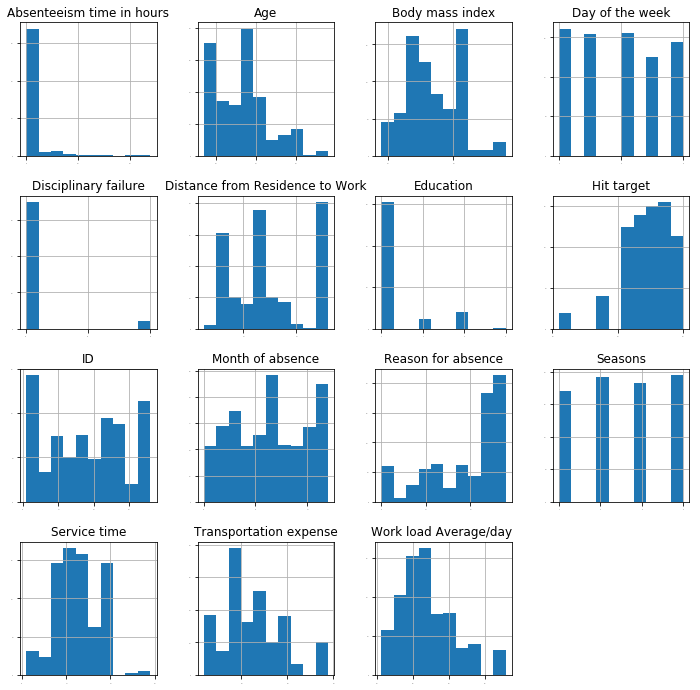

In [11]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12))
pyplot.show()

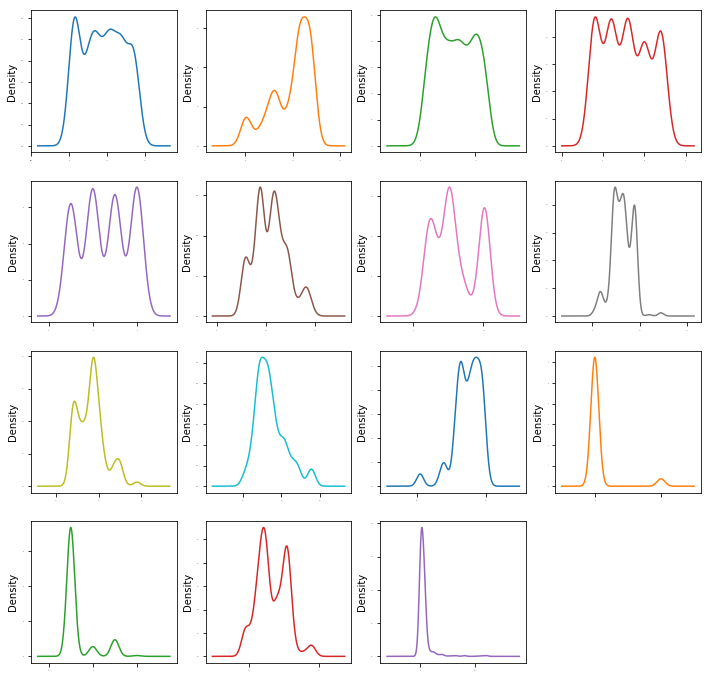

In [17]:
# density
#dataset_ = dataset[:,0:7]
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1, figsize=(12, 12))
pyplot.show()

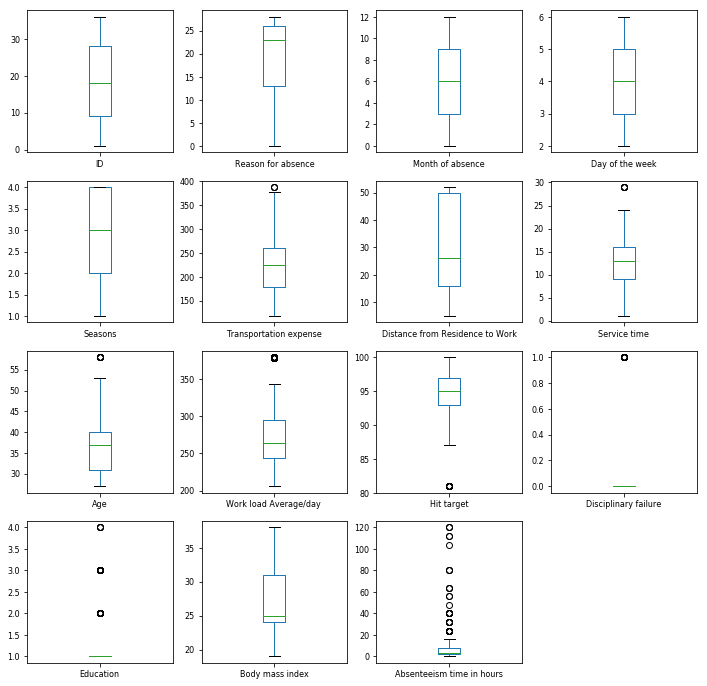

In [19]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8, figsize=(12 , 12))
pyplot.show()

## Multimodal Data Visualizations
Let's look at some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.

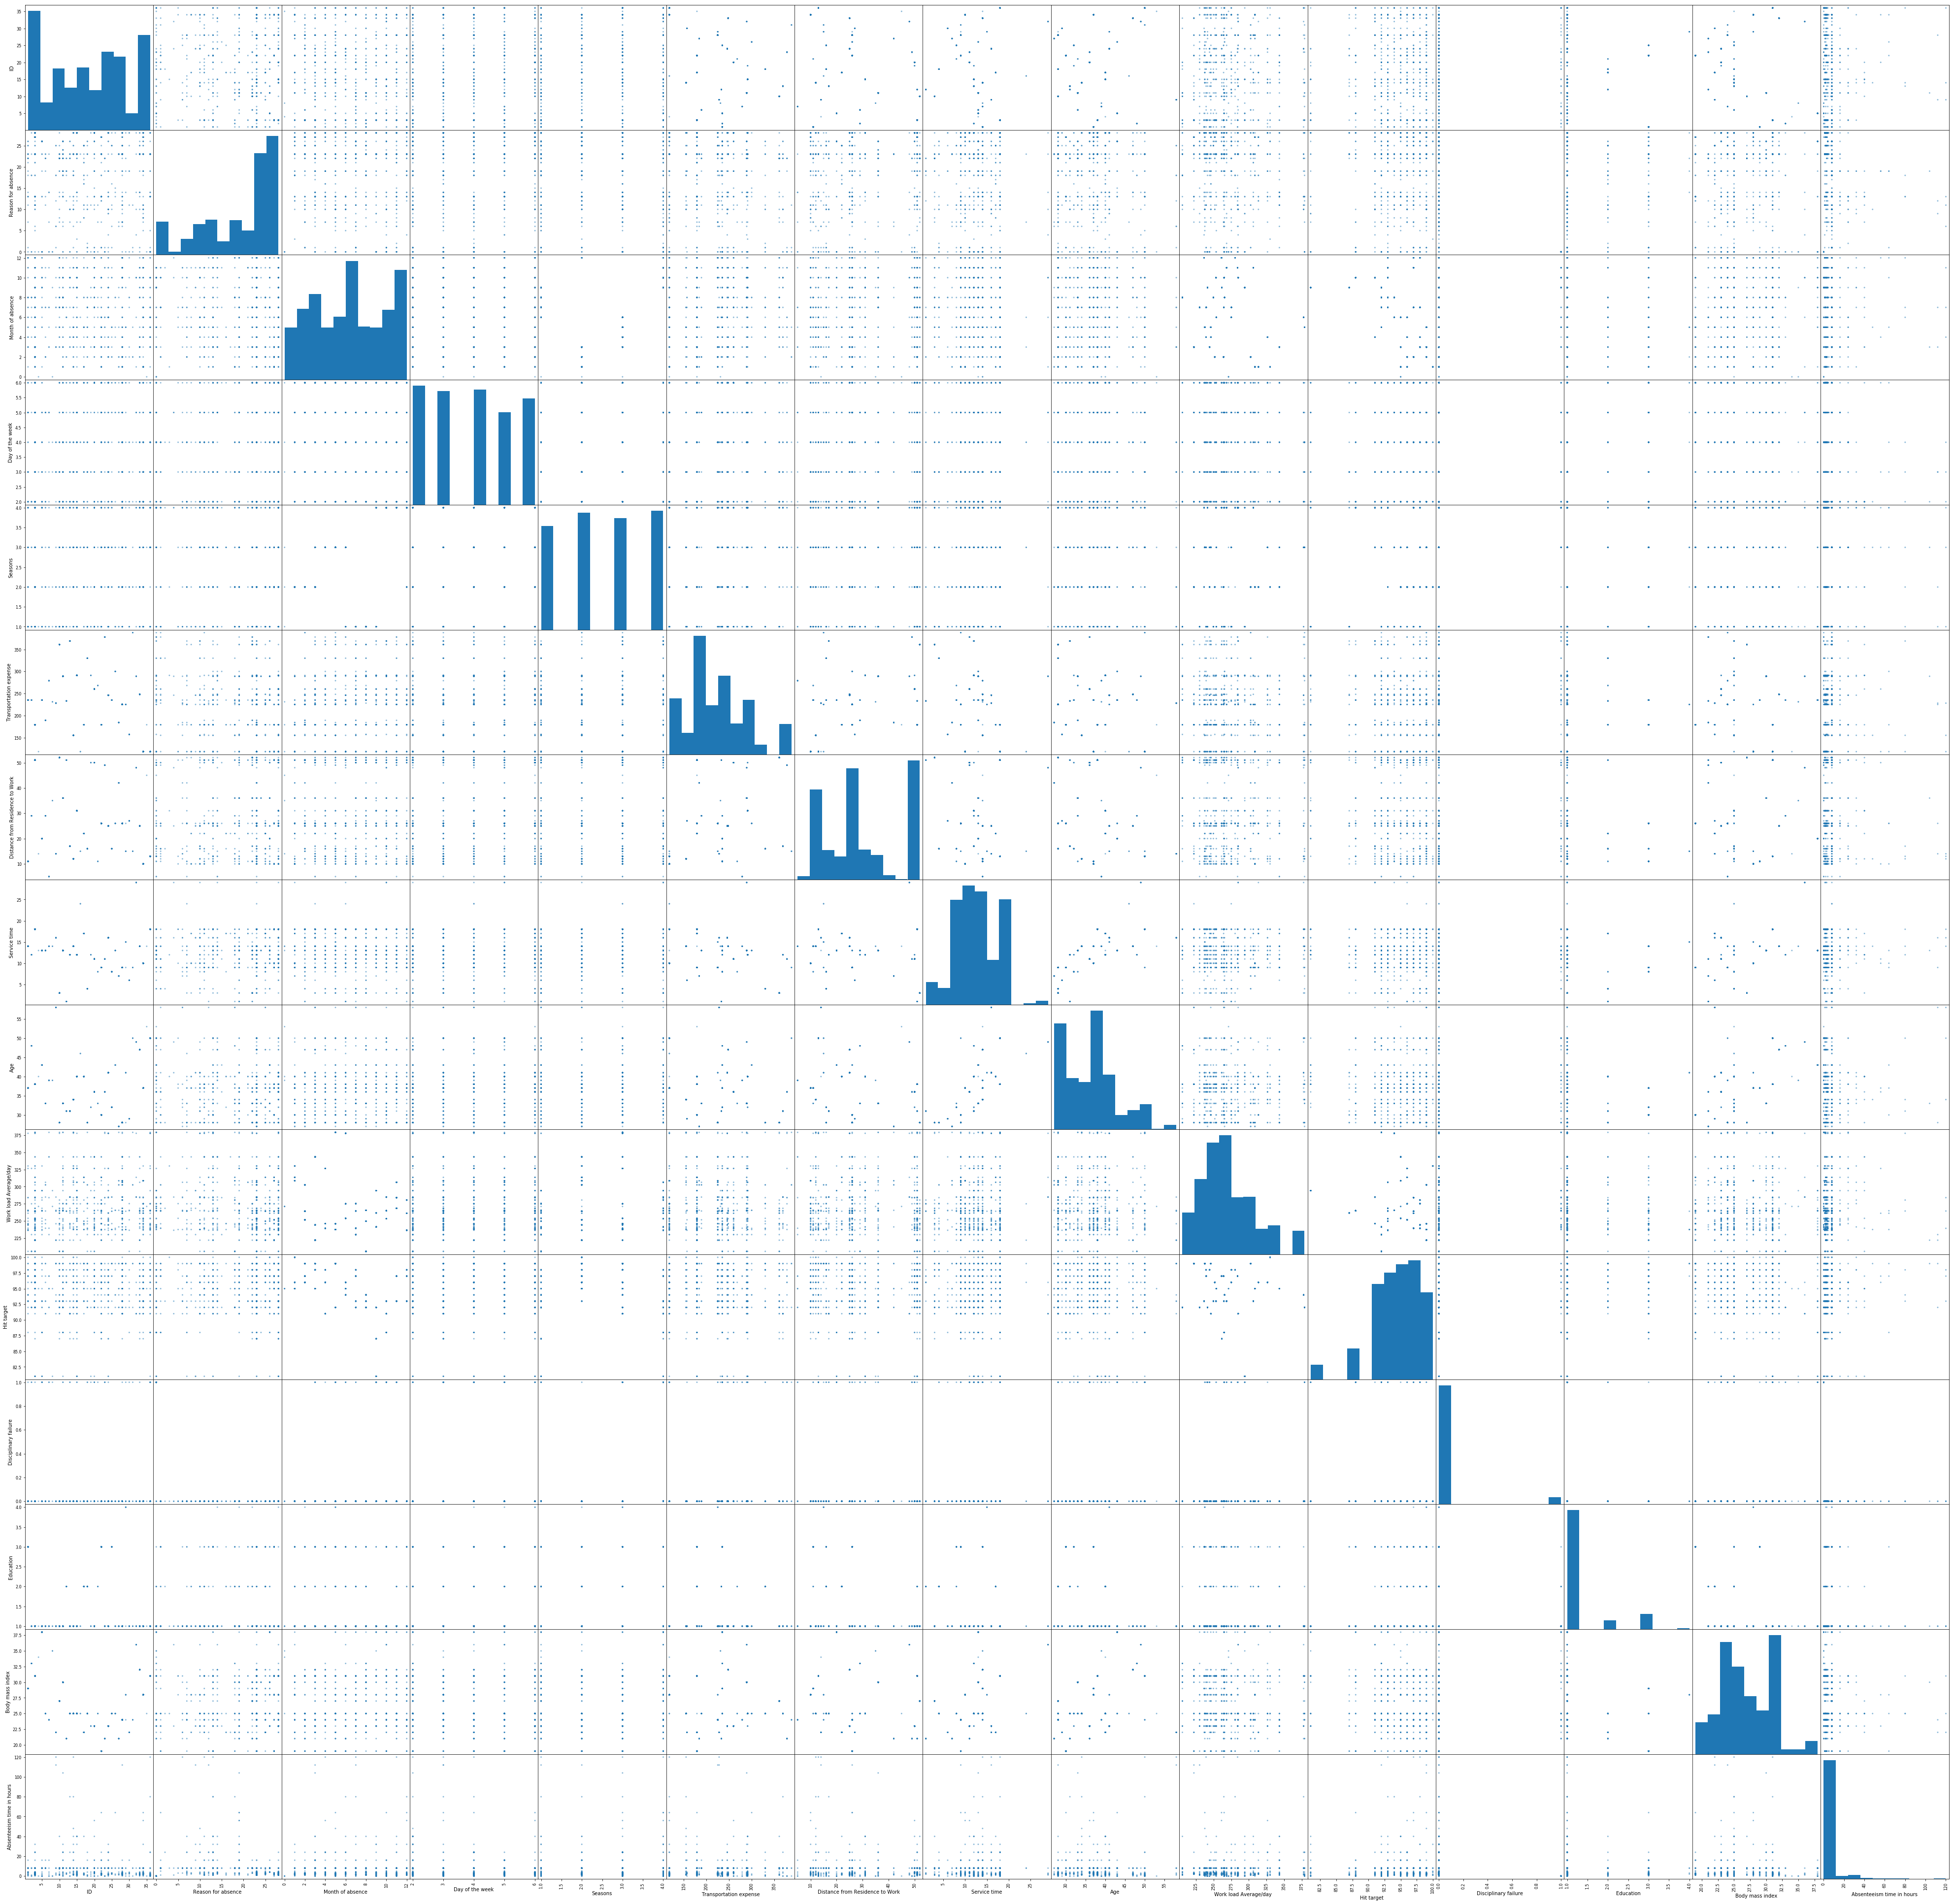

In [22]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(70, 70))
pyplot.show()

In [29]:
import numpy

correlations = dataset.corr()
# plot correlation matrix

correlations

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Body mass index,Absenteeism time in hours
ID,1.00e+00,-0.06,-4.35e-05,3.45e-02,9.85e-02,-2.24e-01,-4.86e-01,-2.73e-01,4.09e-02,9.25e-02,1.88e-02,4.50e-03,-3.63e-02,-0.31,-1.80e-02
Reason for absence,-6.42e-02,1.00,-8.39e-02,1.16e-01,-1.18e-01,-1.19e-01,1.62e-01,4.84e-02,-7.86e-02,-1.23e-01,8.89e-02,-5.45e-01,-4.74e-02,0.04,-1.73e-01
Month of absence,-4.35e-05,-0.08,1.00e+00,-6.53e-03,4.08e-01,1.38e-01,-3.89e-03,-6.29e-02,-1.52e-03,-1.70e-01,-4.60e-01,1.08e-01,-6.61e-02,0.05,2.43e-02
Day of the week,3.45e-02,0.12,-6.53e-03,1.00e+00,4.65e-02,3.40e-02,1.18e-01,2.13e-02,4.46e-03,1.56e-02,3.10e-02,-1.51e-02,5.85e-02,-0.10,-1.24e-01
Seasons,9.85e-02,-0.12,4.08e-01,4.65e-02,1.00e+00,3.70e-02,-6.31e-02,-1.09e-02,-1.21e-02,1.50e-01,-6.12e-02,1.52e-01,-2.95e-03,-0.01,-5.61e-03
Transportation expense,-2.24e-01,-0.12,1.38e-01,3.40e-02,3.70e-02,1.00e+00,2.62e-01,-3.50e-01,-2.28e-01,5.44e-03,-8.02e-02,1.09e-01,-5.51e-02,-0.14,2.76e-02
Distance from Residence to Work,-4.86e-01,0.16,-3.89e-03,1.18e-01,-6.31e-02,2.62e-01,1.00e+00,1.32e-01,-1.46e-01,-6.87e-02,-1.39e-02,-5.65e-02,-2.60e-01,0.11,-8.84e-02
Service time,-2.73e-01,0.05,-6.29e-02,2.13e-02,-1.09e-02,-3.50e-01,1.32e-01,1.00e+00,6.71e-01,-6.68e-04,-7.84e-03,-2.21e-04,-2.13e-01,0.50,1.90e-02
Age,4.09e-02,-0.08,-1.52e-03,4.46e-03,-1.21e-02,-2.28e-01,-1.46e-01,6.71e-01,1.00e+00,-3.94e-02,-3.92e-02,1.04e-01,-2.22e-01,0.47,6.58e-02
Work load Average/day,9.25e-02,-0.12,-1.70e-01,1.56e-02,1.50e-01,5.44e-03,-6.87e-02,-6.68e-04,-3.94e-02,1.00e+00,-8.94e-02,2.90e-02,-7.50e-02,-0.09,2.47e-02


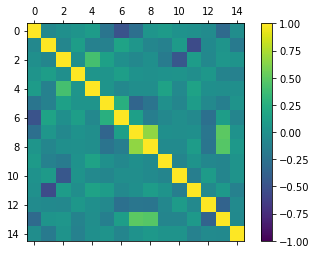

In [30]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)

pyplot.show()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

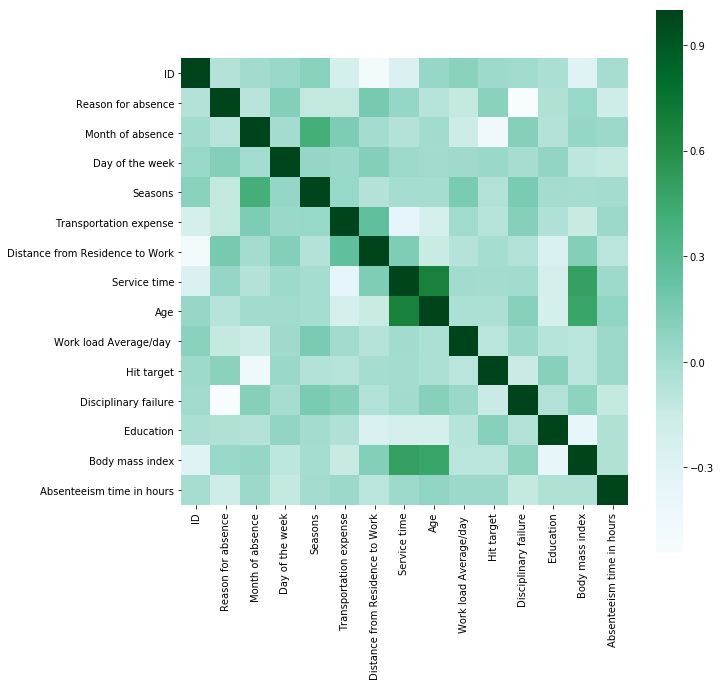

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, square = True,cmap='BuGn')

## Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it
would be worth trying:
- Feature selection and removing the most correlated attributes.
- Normalizing the dataset to reduce the eect of diering scales.
- Standardizing the dataset to reduce the eects of diering distributions.
With lots of additional time I would also explore the possibility of binning (discretization)
of the data. This can often improve accuracy for decision tree algorithms.


## Validation Dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to conrm the
accuracy of our nal model. It is a smoke test that we can use to see if we messed up and to

In [33]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression
algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision
trees and even SVM may do well. I have no idea. Let's design our test harness. We will use
10-fold cross-validation. The dataset is not too small and this is a good standard test harness
conguration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE
will give a gross idea of how wrong all predictions are (0 is perfect).

In [34]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let's create a baseline of performance on this problem and spot-check a number of dierent
algorithms. We will select a suite of dierent algorithms capable of working on this regression
problem. The six algorithms selected include:
 Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).
 Nonlinear Algorithms: Classication and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).

In [35]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [38]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -10.497836 (2.214207)
LASSO: -11.890138 (1.918983)
EN: -11.482276 (1.853487)
KNN: -4.999443 (1.995304)
CART: 0.000000 (0.000000)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/pyth

SVR: -14.441002 (2.803851)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


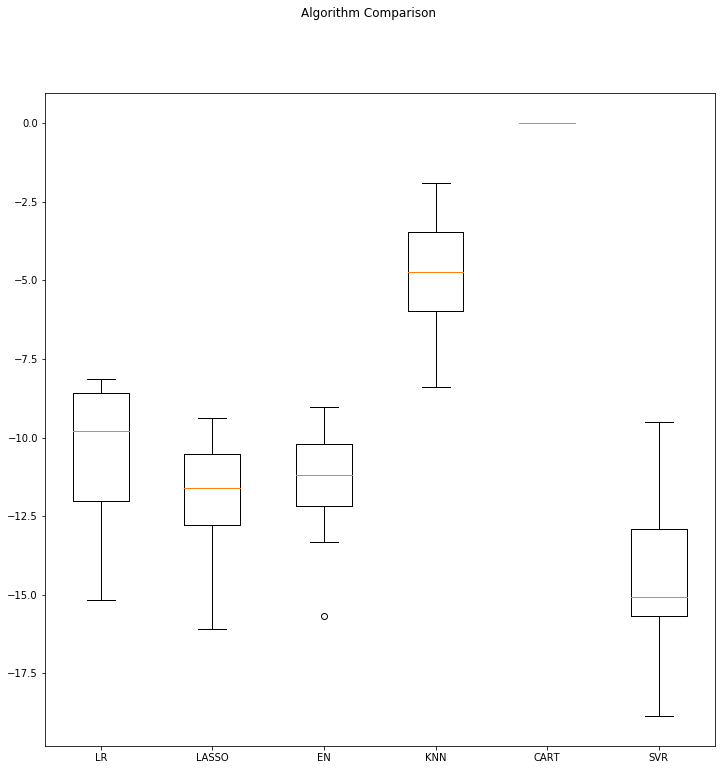

In [40]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Evaluate Algorithms: Standardization
We suspect that the diering scales of the raw data may be negatively impacting the skill of
some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross-validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [42]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))

pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -10.497836 (2.214207)
ScaledLASSO: -13.446475 (1.786251)
ScaledEN: -12.143606 (1.511524)
ScaledKNN: -5.850688 (1.731100)
ScaledCART: -0.042373 (0.127119)
ScaledSVR: -6.735981 (1.727739)


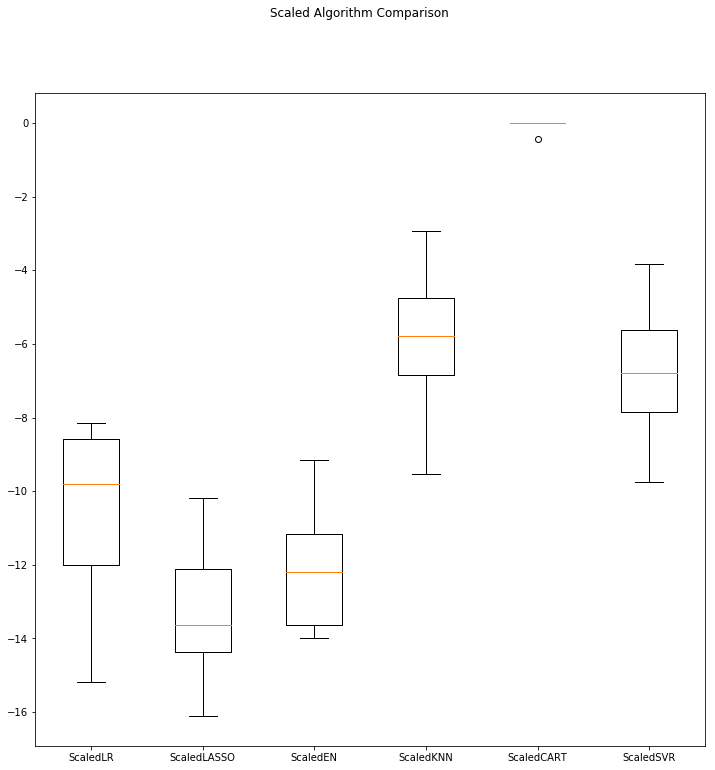

In [45]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 12))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Improve Results With Tuning
We know from the results in the previous section that KNN achieves good results on a scaled
version of the dataset. But can it do better. The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of dierent numbers of neighbors and see if
we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary
range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold
cross-validation on a standardized copy of the training dataset.

In [46]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -5.079580 using {'n_neighbors': 3}
-5.121622 (2.510805) with: {'n_neighbors': 1}
-5.079580 (1.416913) with: {'n_neighbors': 3}
-5.889392 (1.778490) with: {'n_neighbors': 5}
-6.397787 (1.610742) with: {'n_neighbors': 7}
-6.972827 (1.693058) with: {'n_neighbors': 9}
-7.394293 (1.678613) with: {'n_neighbors': 11}
-7.749200 (1.807576) with: {'n_neighbors': 13}
-7.905390 (1.793636) with: {'n_neighbors': 15}
-8.127186 (1.817822) with: {'n_neighbors': 17}
-8.311854 (1.839305) with: {'n_neighbors': 19}
-8.472494 (1.843692) with: {'n_neighbors': 21}


## Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four dierent ensemble machine learning
algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross-validation and pipelines that
standardize the training data for each fold.

In [49]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -1.471325 (0.247860)
ScaledGBM: -0.070935 (0.093650)
ScaledRF: -0.157054 (0.279085)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinez

ScaledET: -0.043855 (0.078907)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/felipemartinez

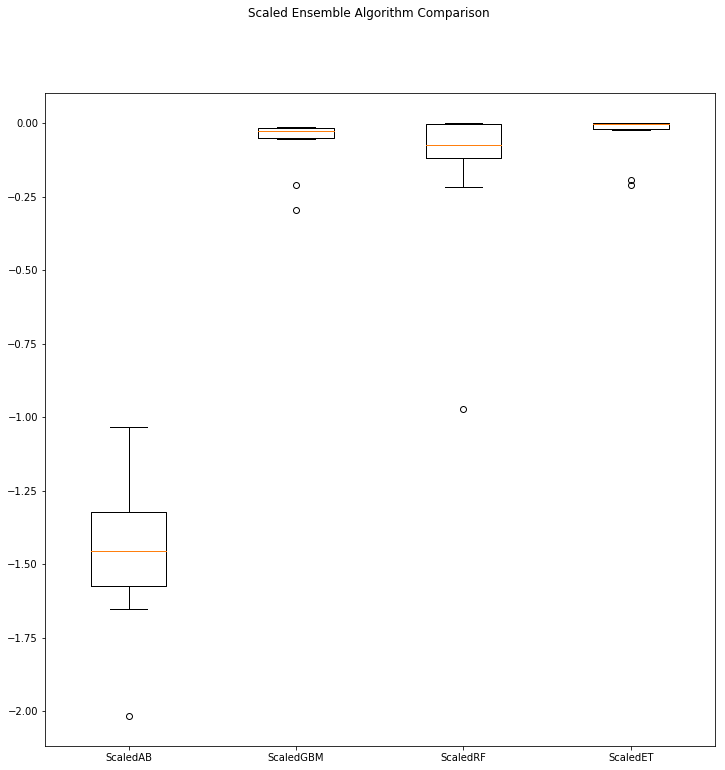

In [51]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 12))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune Ensemble Methods
The default number of boosting stages to perform (n estimators) is 100. This is a good
candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will
look at tuning the number of stages for gradient boosting. Below we dene a parameter grid
n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross-validation.

In [53]:
#Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.042480 using {'n_estimators': 400}
-0.232018 (0.100365) with: {'n_estimators': 50}
-0.070693 (0.092615) with: {'n_estimators': 100}
-0.047054 (0.091105) with: {'n_estimators': 150}
-0.044266 (0.090988) with: {'n_estimators': 200}
-0.043280 (0.090749) with: {'n_estimators': 250}
-0.042742 (0.090423) with: {'n_estimators': 300}
-0.042537 (0.090291) with: {'n_estimators': 350}
-0.042480 (0.090266) with: {'n_estimators': 400}


## Finalize Model
In this section we will nalize the gradient boosting model and evaluate it on our hold out
validation dataset. First we need to prepare the model and train it on the entire training dataset.
This includes standardizing the training dataset before training.

In [55]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

1.159052619192274
